# Stroke/Heart Mortality Rate Trends
__Analysis of data about mortality amongst adults__

## Introduction

__Question: Is there a significant difference in mortalitiy rates between groups baced on race and ethnicity?__

We believe that there is a significant differnce in mortality rates among different groups of people based on assumption. To explore and support this we pulled Heart and Stroke mortality data from the CDC website. We are targeting health care leaders and local authorities that handle budgeting. If our initial assumption is correct, than there is a target group of people that would need extra resources and assistance because their high mortality rates compared to others could inidicate a lack of local funding, ineffective policies, or possible another underlying issue.

## Exploratory Data Analysis

Stroke(2013) - [Stroke Data](https://data.world/us-hhs-gov/12ea7a13-b229-43b4-b19b-1459e9a64d3f)

Heart(2017) - [Heart Data](https://data.world/us-hhs-gov/01969266-32c7-4071-a84e-4fe524d472c2)

Both Stroke and Heart have similiar data columns. They contain number of deaths per 100,00 population per county in the US. Because of this there are almost 60k rows in each data set. Columns for race/ethnicity and gender are also present. Both data sets contain data for only the year listed.

In [34]:
from DFfunctions import *
from MLfunctions import *

heart = pd.read_csv('heartmortality.csv')
stroke = pd.read_csv('strokemortality.csv')

heart.head()

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Location 1
0,2013,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,147.4,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2013,"(55.440626, -161.962562)"
1,2013,AK,Aleutians West,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,229.4,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2016,"(52.995403, -170.251538)"
2,2013,AK,Anchorage,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,255.5,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2020,"(61.159049, -149.103905)"
3,2013,AK,Bethel,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,305.5,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2050,"(60.924483, -159.749655)"
4,2013,AK,Bristol Bay,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Gender,Overall,Race/Ethnicity,Overall,T2,2060,"(58.754192, -156.694709)"


### Data Cleaning

The columns we want to target are the deaths per 100k population, race/ethnicity, and Location by state. By keeping States we will be able to classify specific regions of the US such as the Midwest and use that to find a correlation between race/ethnicity and mortality rates per region. All other columns will be dropped because they do not directly help find an answer to our hypothesis. Since both data sets only contain information for one year, we can not find anything related to date and time frame. Furthermore, the various geolocation columns will be dropped since we are using the States to classify a region.

In [35]:
heartNotUsed = ['Year','LocationDesc','GeographicLevel','DataSource','Class','Topic','Data_Value_Unit','Data_Value_Type',
                 'StratificationCategory1','Data_Value_Footnote_Symbol','StratificationCategory2',
                 'TopicID','LocationID','Location 1']
heartDf = removeC(heart, heartNotUsed)

strokeNotUsed = ['Year','LocationDesc','DataSource','Class','Topic','Data_Value_Unit','Data_Value_Type',
                 'StratificationCategory1','Data_Value_Footnote_Symbol','StratificationCategory2',
                 'TopicID','LocationID','Y_lat','X_lon','GeographicLevel']
strokeDf = removeC(stroke, strokeNotUsed)

Data column names will be renamed to clearly display the information we are targeting and rows that have incomplete values will be dropped.

In [36]:
heartDf = heartDf.rename(columns = {'Data_Value': 'Deaths per 100,000', 'Data_Value_Footnote': 'Sufficiency?'
                               ,'Stratification1': 'Gender', 'Stratification2': 'Race/Ethnicity'})

strokeDf = strokeDf.rename(columns = {'Data_Value': 'Deaths per 100,000', 'Data_Value_Footnote': 'Sufficiency?'
                                 ,'Stratification1': 'Gender','Stratification2': 'Race/Ethnicity'})

# Filtering data to obtain overall results for gender and clear any insufficient data from our dataset
heartDf = getSufficientData(heartDf)
strokeDf = getSufficientData(strokeDf)

notWanted = ['Sufficiency', 'Sufficiency?', 'Gender']

heartUpdated = removeC(heartDf, notWanted)
strokeUpdated = removeC(strokeDf, notWanted)

strokeUpdated.head()

,LocationAbbr,"Deaths per 100,000",Race/Ethnicity
89,AK,55.7,White
90,AK,70.0,White
92,AK,73.3,White
94,AK,101.4,White
95,AK,59.6,White


What we are left with is a data set that contains Location, Deaths per 100k, and our target columns Race/Ethnicity, These columns can now be used to find correalations of mortality rates and ethnicity. For our intdended scope we now have a complete data set that we can continue to visualize since we can transform the deaths column to averages of deaths per race and ethnicity. In our case we have White, Black, Hispanics, Asian and Pacific Islanders, and American Indian and Alaskan Native present in our data.

## Visualizations

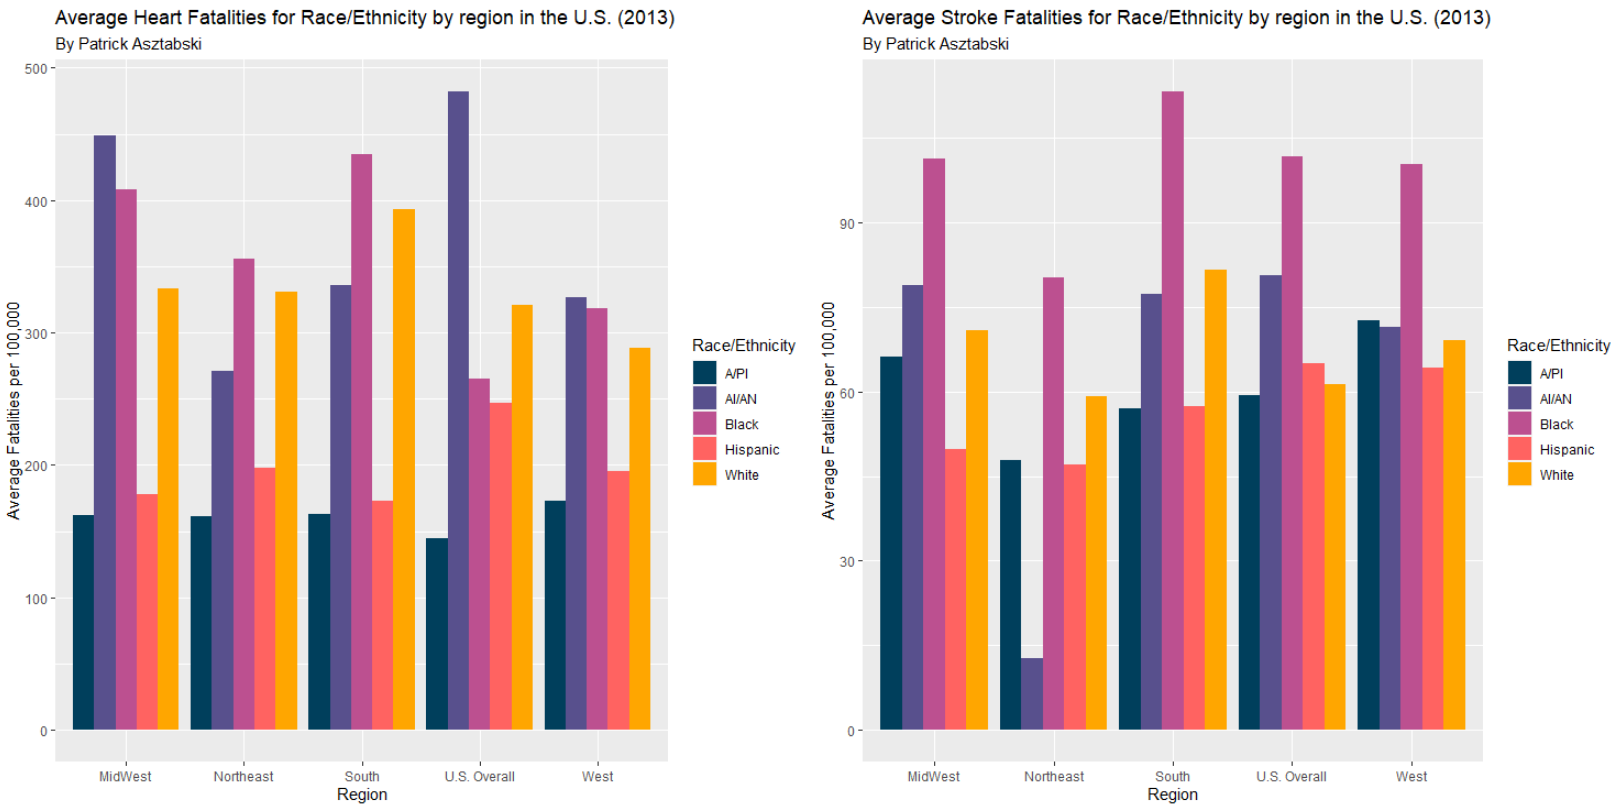

## ML/Stats model 

### ML Model KNeighborsClassifier

For the ML model another data set was used that contained information on patients, specifcally heart related such as cholesterol levels to predict the change of heart attack. The intended goal of using this dataset and ML model was to find causes of heart attack and correlate it to ethnicity tendencies such as food culture to explore reasons as to why there are signiciant mortaility rate differences.

In [42]:
heartML = pd.read_csv("heartML.csv")
heartMLNotUsed = ['age', 'sex']
heartML = removeC(heartML, heartMLNotUsed)
heartML = heartML.rename(columns = {'cp':'chest_pain','trtbps': 'resting_bp(mmhg)','chol': 'cholestoral(mg/dl)','fbs': 'fasting_blood_sugar(1/0)',
                                    'thalachh': 'max_heart_rate','exng': 'exercise_anigna(1/0)','caa': 'num_major_vessels(0-3)'
                                    })
heartML.drop_duplicates(inplace=True)
heartML.head()

,chest_pain,resting_bp(mmhg),cholestoral(mg/dl),fasting_blood_sugar(1/0),restecg,max_heart_rate,exercise_anigna(1/0),oldpeak,slp,num_major_vessels(0-3),thall,output
0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,1,130,204,0,0,172,0,1.4,2,0,2,1
3,1,120,236,0,1,178,0,0.8,2,0,2,1
4,0,120,354,0,1,163,1,0.6,2,0,2,1


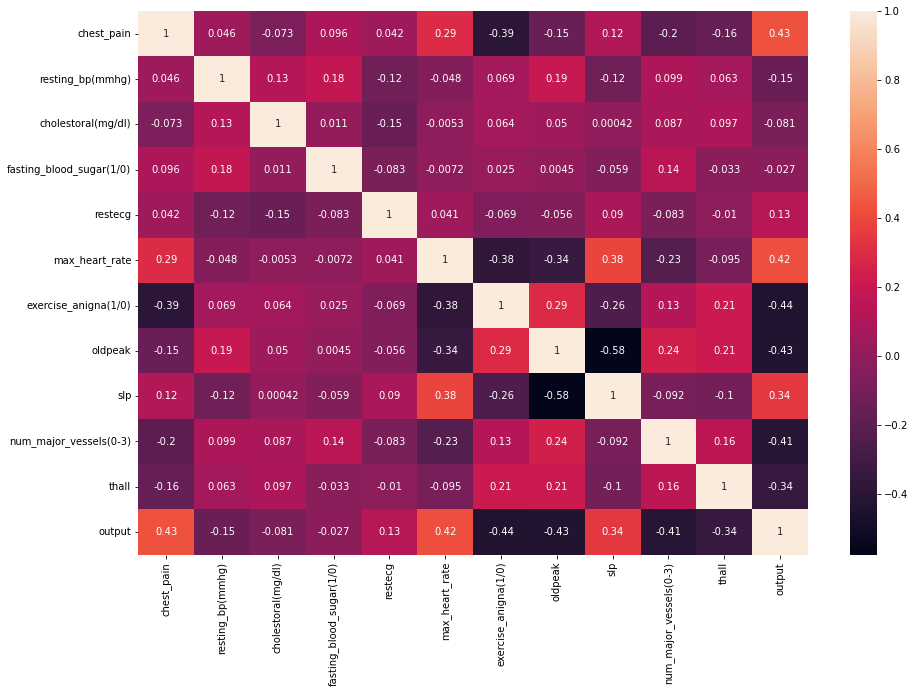

In [43]:
plt.figure(figsize = (15,10))
sns.heatmap(heartML.corr(), annot = True)
plt.show()

# ML Model : KNN Classifier

Our model works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels. Our model takes in the mode of the calculated dataset, which yields 57% accuracy in testing the dataset.<br>
Further our macro averages for precision (the values that the model thought were correct) is 0.78, our recall value (the values identified correctly by the model) is 0.58, our F1 score (the harmonic mean between precision and recall) is 0.43, and support value (the number of the true responses that lie in our class) 0.61.

In [38]:
model = KNeighborsClassifier()

# preprocessing the dataset
X = heartML.iloc[:,heartML.columns != 'output']
y = heartML.output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5, stratify=y)

# standard scaler
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the model
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test)

# Training the model
model.fit(X_train_scaled, y_train)

# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.07      0.13        28
           1       0.56      1.00      0.72        33

    accuracy                           0.57        61
   macro avg       0.78      0.54      0.43        61
weighted avg       0.76      0.57      0.45        61



/home/kevin/anaconda3/envs/cs418env/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Text(0.5, 33.0, 'Predicted Values')

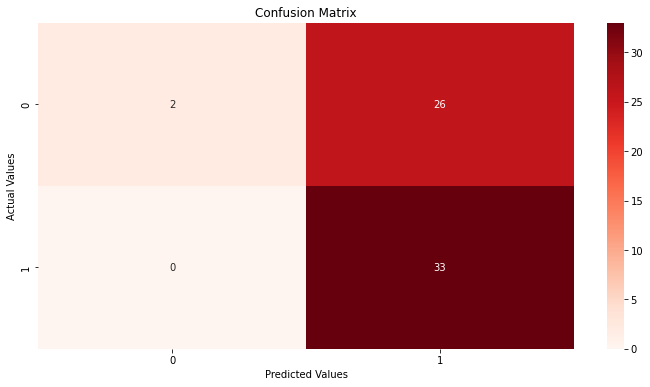

In [40]:
# confusion matrix

cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

## Conclusion

Prompt: 

we found a significant difference

talk about this being a broad issue and there are many variables as to why differnt races/ethnicity are affected differently(food culture for example).

Explain rooms for improvement and explain that we are on the right track, probably just one data set away (We have visuals per region, probably just need healhcare cost per region to come to more conlusions)